In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
train_df

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,237799.0,NaN,0.748942,0.511234,0.002913,0.0,0.173803,-8.853673,0,0.078060,168.262924,3,0.178159,0
39996,39996,191119.0,0.067488,0.672830,0.889685,0.001225,5.0,0.122924,-7.798993,0,0.188607,110.684544,3,0.790626,0
39997,39997,160879.0,0.877431,0.409065,0.292671,NaN,10.0,0.110664,-15.378585,0,0.031294,99.556074,3,0.177947,1
39998,39998,193918.0,NaN,0.365738,NaN,0.000339,1.0,0.356308,-4.661977,1,0.054096,139.857384,3,0.772978,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [21]:
train_df.columns

Index(['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [22]:
subset = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']
for i in subset:
    print(train_df.value_counts(subset=i))

acousticness
 0.023058    2
 0.129865    2
 0.268625    2
 0.012316    2
-0.013551    1
            ..
 0.060295    1
 0.060293    1
 0.060292    1
 0.060291    1
 1.065284    1
Length: 36004, dtype: int64
danceability
0.482273    2
0.348442    2
0.684288    1
0.684142    1
0.684195    1
           ..
0.492700    1
0.492686    1
0.492673    1
0.492670    1
0.957131    1
Length: 35972, dtype: int64
energy
 0.894792    2
 0.798807    2
 0.853141    2
 0.834828    2
-0.001682    1
            ..
 0.602227    1
 0.602198    1
 0.602174    1
 0.602147    1
 1.039741    1
Length: 36021, dtype: int64
instrumentalness
 0.000960    2
-0.000210    2
 0.002780    2
 0.001719    2
 0.002590    2
            ..
 0.001303    1
 0.001303    1
 0.001302    1
 0.001302    1
 1.075415    1
Length: 35999, dtype: int64
key
0.0     5175
6.0     4949
10.0    4302
2.0     4080
8.0     3028
5.0     2985
9.0     2881
7.0     2690
4.0     2239
1.0     2143
3.0     1346
11.0     117
dtype: int64
liveness
0.13646

## Check for NANs

In [6]:
train_df.isnull().sum()

id                     0
song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64

In [7]:
train_df_drop_na = train_df.dropna(axis=0)

In [8]:
train_df_drop_na.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000
mean,19962.571122,193358.986094,0.277111,0.571251,0.684489,0.035647,5.035576,0.198954,-7.378523,0.322788,0.093469,116.809187,3.397184,0.581972,0.365201
std,11520.271716,45874.796177,0.298536,0.190446,0.212942,0.148039,3.376328,0.152021,3.871002,0.467556,0.082315,26.163530,0.524866,0.237401,0.481500
min,3.000000,25658.000000,-0.011000,0.043961,-0.001682,-0.004398,0.000000,0.030298,-30.170399,0.000000,0.015065,62.055779,2.000000,0.013398,0.000000
25%,9928.000000,166184.000000,0.039089,0.424551,0.541085,0.000938,2.000000,0.111769,-9.506172,0.000000,0.038470,97.235864,3.000000,0.400503,0.000000
50%,20037.000000,186768.000000,0.140563,0.609771,0.705080,0.001969,5.000000,0.136033,-6.309642,0.000000,0.055876,113.819685,3.000000,0.600472,0.000000
75%,29879.500000,215646.500000,0.485879,0.718007,0.870843,0.003227,8.000000,0.214039,-4.593041,1.000000,0.117994,128.601471,4.000000,0.761275,1.000000
max,39999.000000,491671.000000,1.062516,0.954945,1.033747,1.075415,11.000000,0.979632,-0.877346,1.000000,0.560748,212.425482,5.000000,1.018302,1.000000


In [9]:
X = train_df_drop_na.drop(columns=['song_popularity'])
y = train_df_drop_na['song_popularity']

/home/rohan/anaconda3/envs/mlds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rohan/anaconda3/envs/mlds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rohan/anaconda3/envs/mlds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

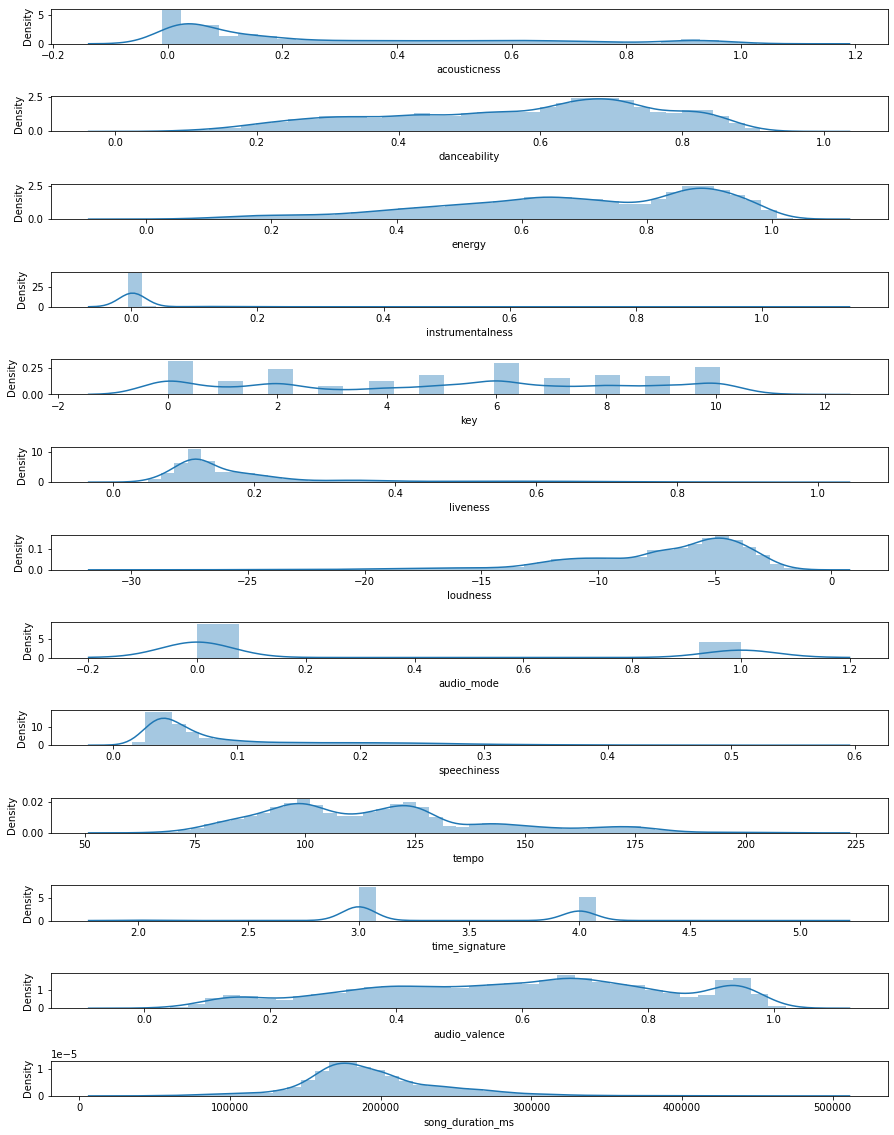

In [10]:
fig, ax = plt.subplots(13, 1, figsize=(15,20))
plt.subplots_adjust(hspace=1.5)
for i,col in enumerate(X.columns[1:]):
    sns.distplot(X[col], ax=ax[i-1])

/home/rohan/anaconda3/envs/mlds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rohan/anaconda3/envs/mlds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rohan/anaconda3/envs/mlds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

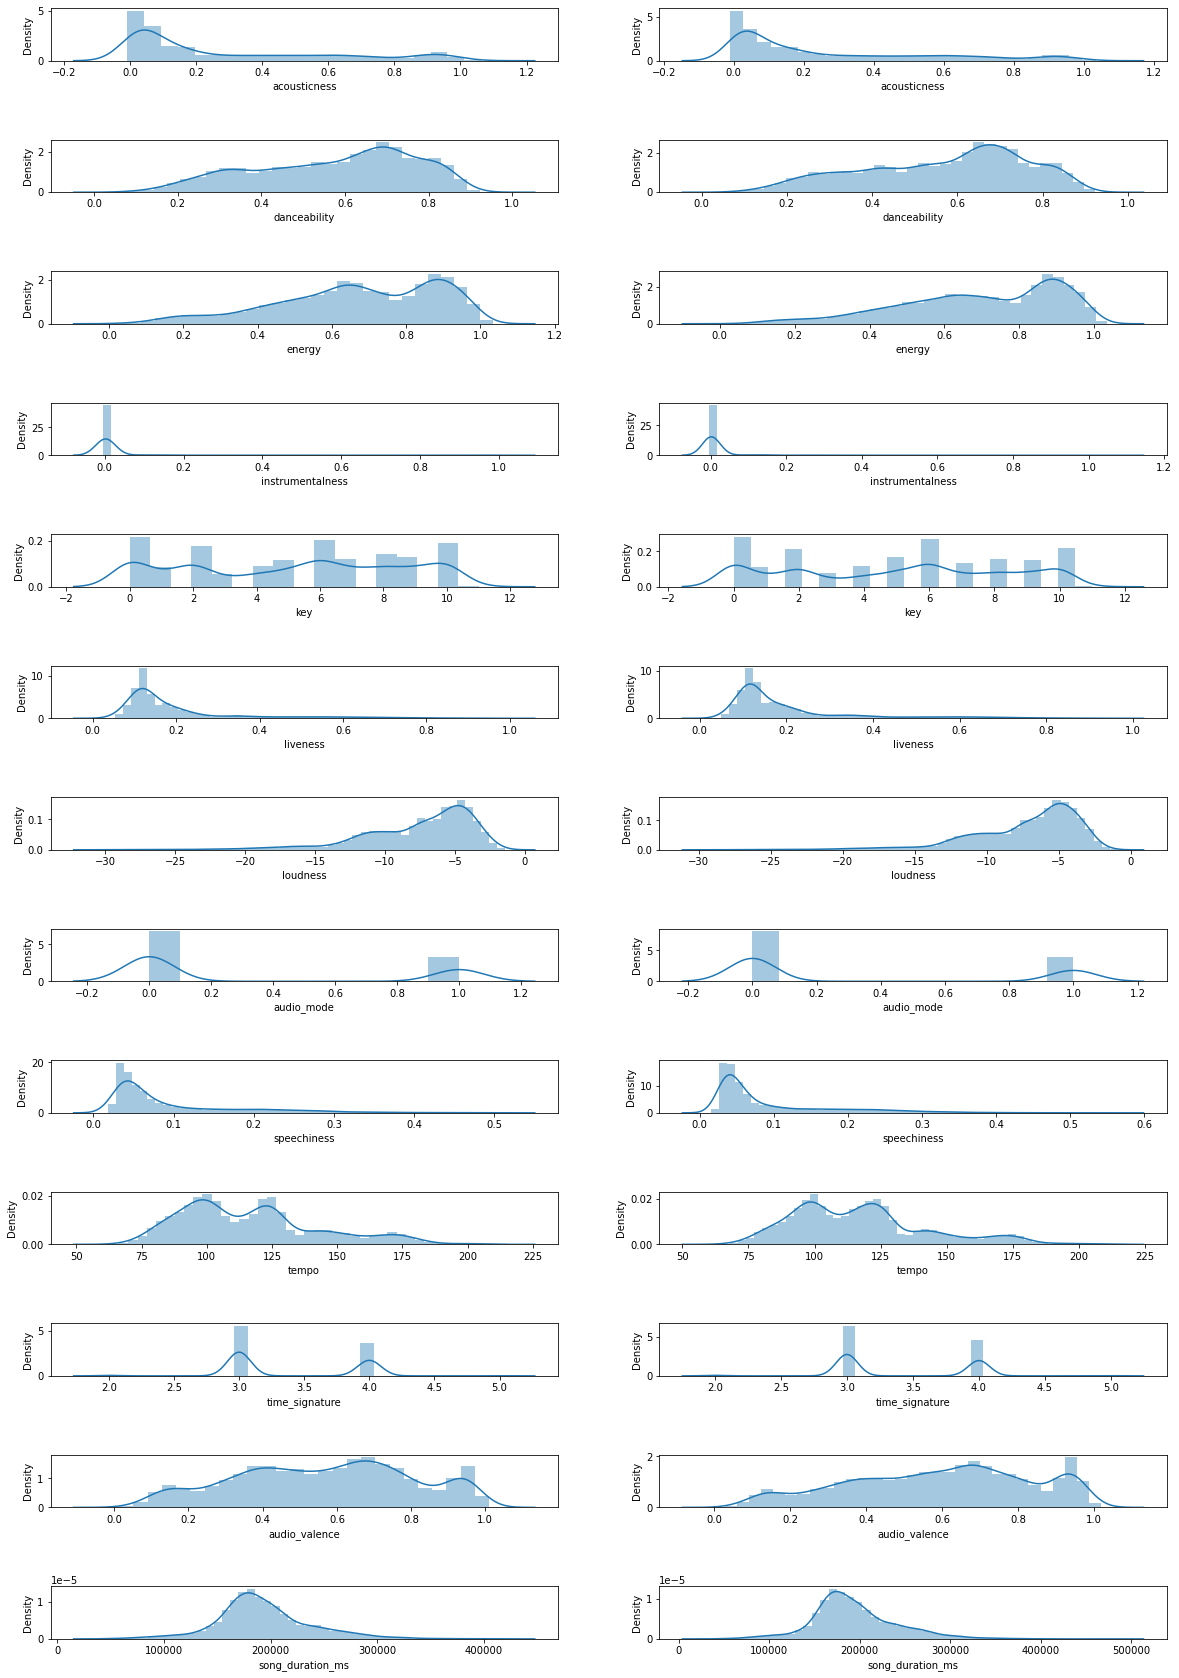

In [26]:
fig, ax = plt.subplots(13, 2, figsize=(20,30))
plt.subplots_adjust(hspace=1.5)
for i,col in enumerate(X.columns[1:]):
    sns.distplot(train_df_drop_na[train_df_drop_na['song_popularity']==1][col], ax=ax[i-1,0])
    sns.distplot(train_df_drop_na[train_df_drop_na['song_popularity']==0][col], ax=ax[i-1,1])

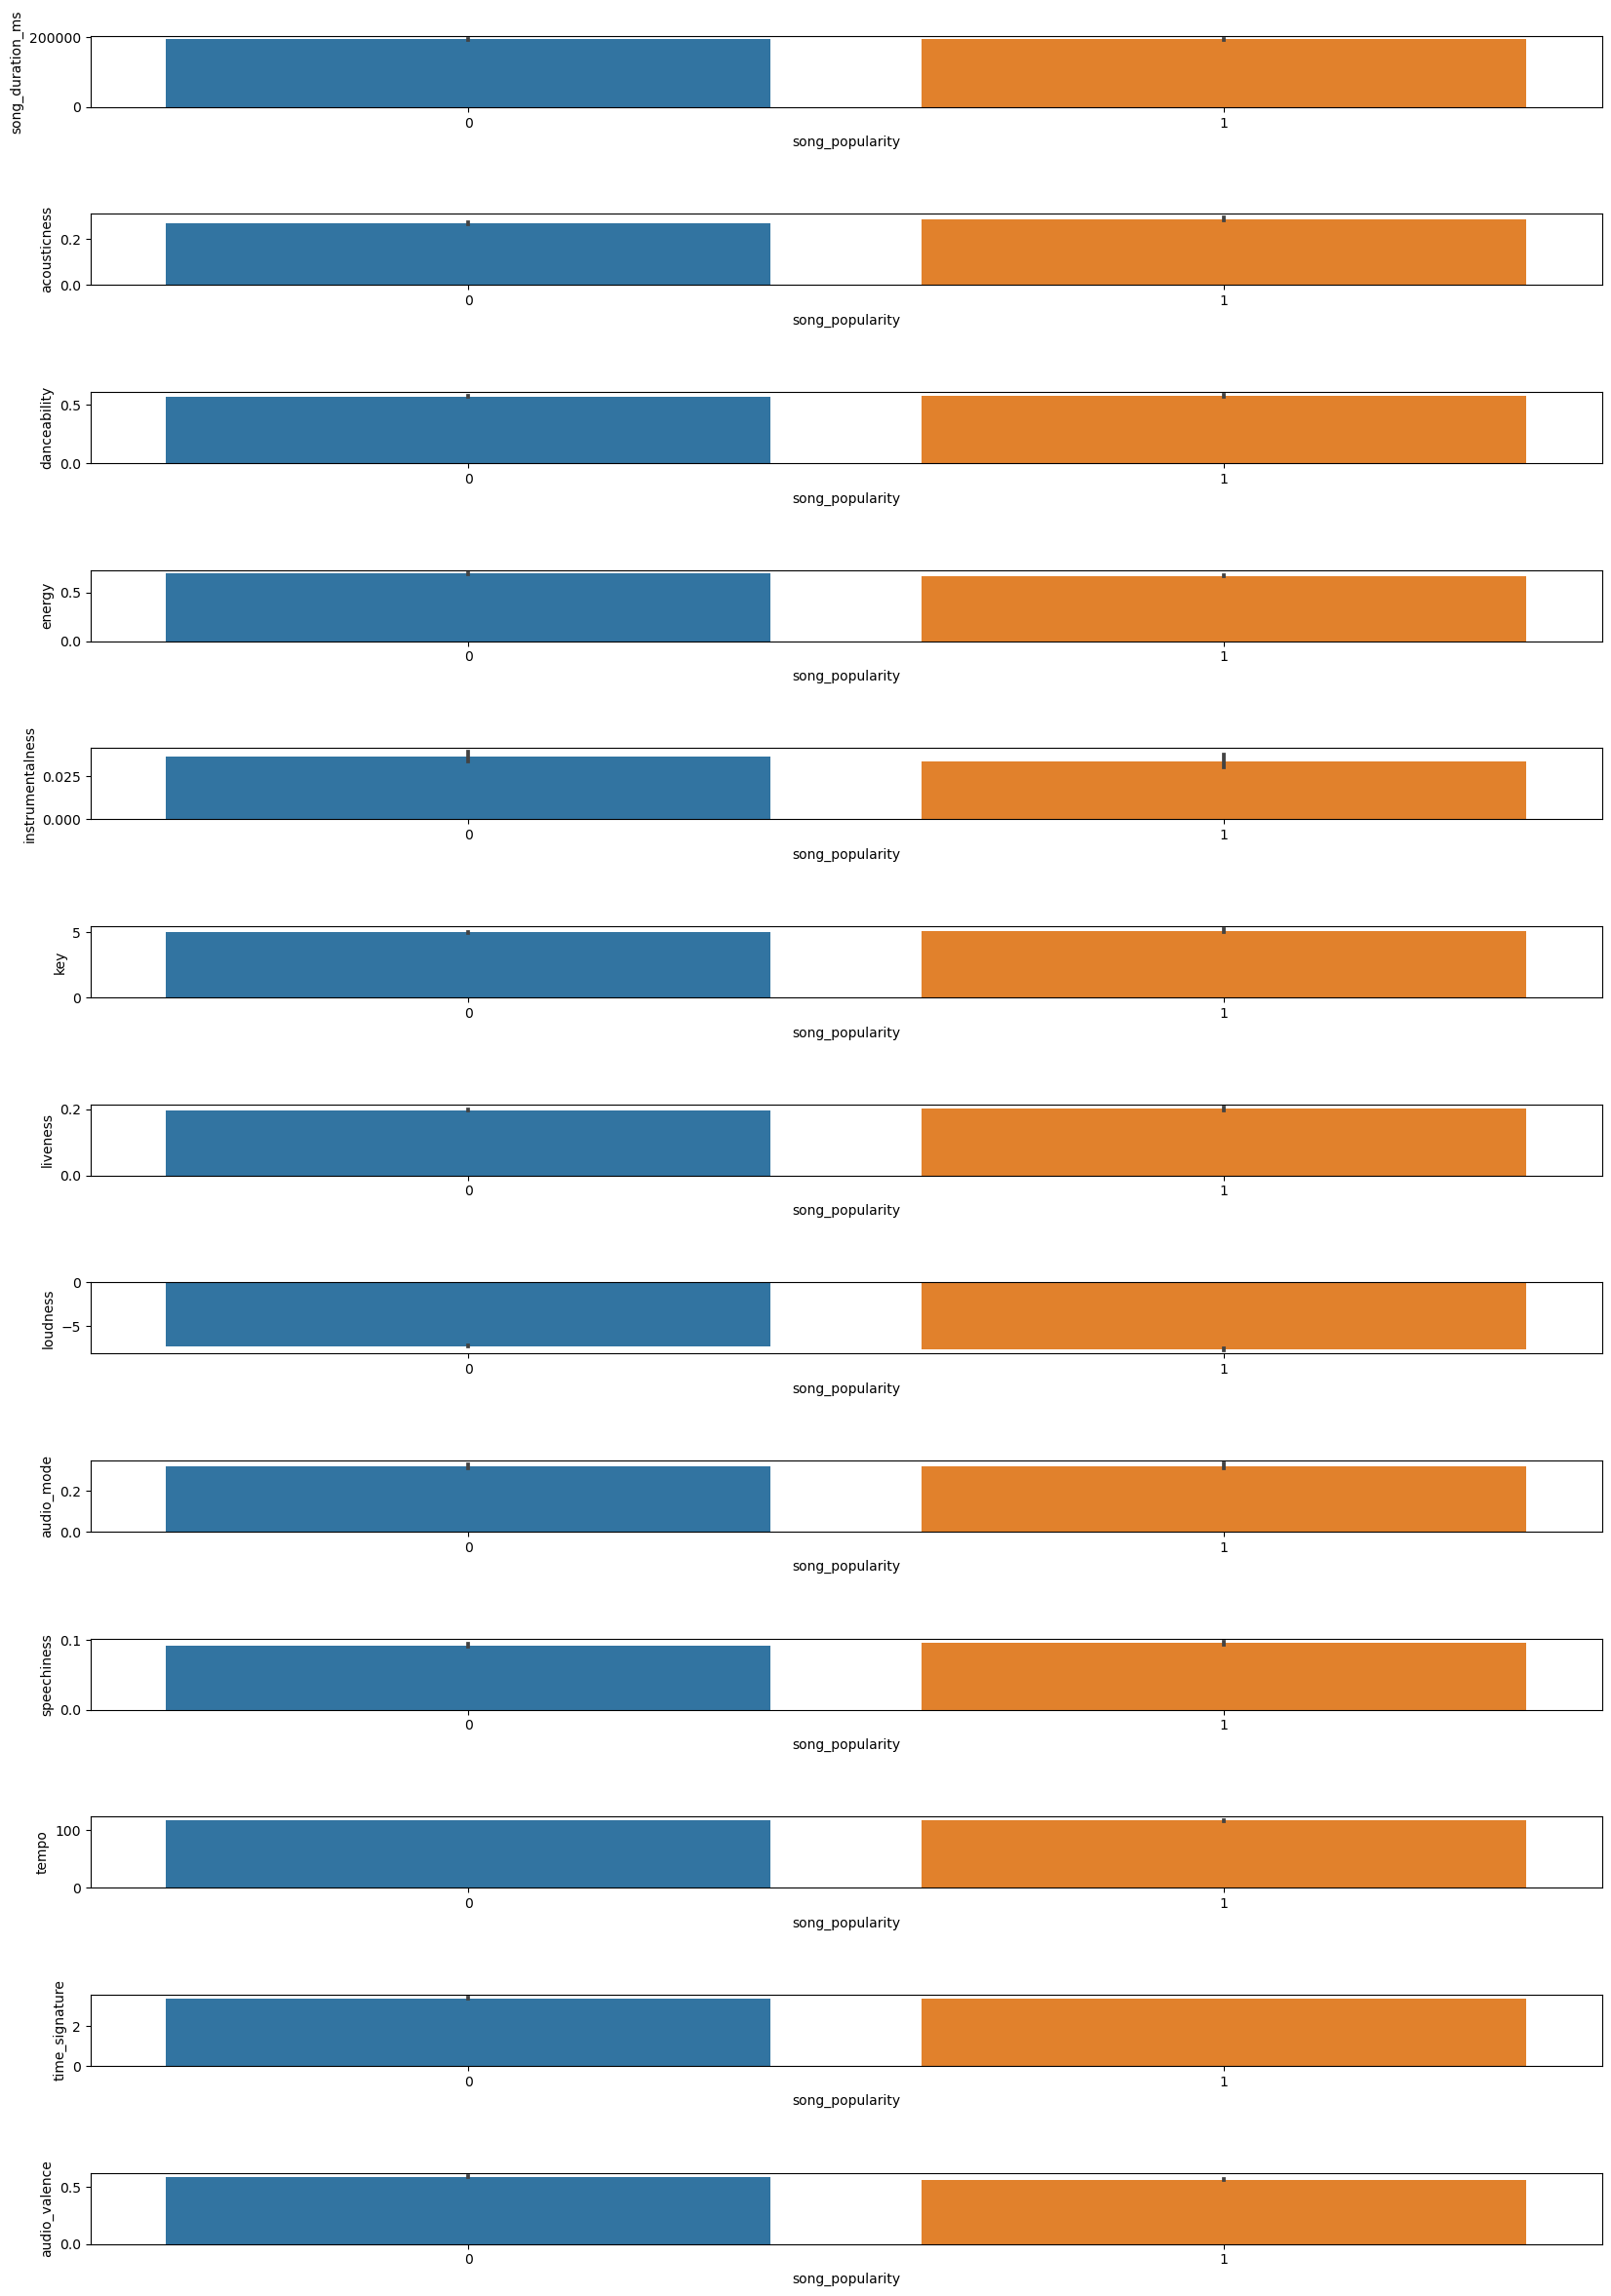

In [27]:
fig, ax = plt.subplots(13, 1, figsize=(20,30))
fig.set_dpi(100)
plt.subplots_adjust(hspace=1.5)
for i,col in enumerate(X.columns[1:]):
    sns.barplot(x=y,y=X[col], ax=ax[i])